# Домашняя работа по модулю 2

Предсказание рака лёгких

Датасет приложен к уроку

● Проведите разведочный анализ данных

● Воспользуйтесь логистической регрессией
из пакета sklearn

● Оформите результат в виде ноутбука Jupiter

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score


In [3]:
ds = pd.read_csv('survey lung cancer.csv')
ds.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
ds.shape

(309, 16)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
pd.isnull(ds).sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

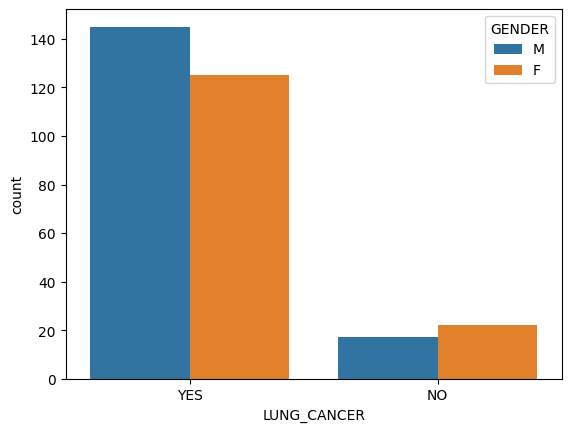

In [8]:
sns.countplot(data=ds, x='LUNG_CANCER', hue='GENDER')

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

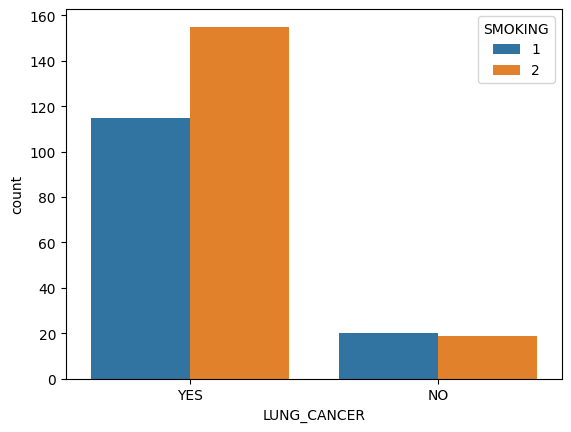

In [9]:
sns.countplot(data=ds, x='LUNG_CANCER', hue='SMOKING')

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Перед построением тепловой карты нормализуем данные
le = LabelEncoder()
ds['LUNG_CANCER'] = le.fit_transform(ds['LUNG_CANCER'])
ds['GENDER'] = le.fit_transform(ds['GENDER'])

ds.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<AxesSubplot:>

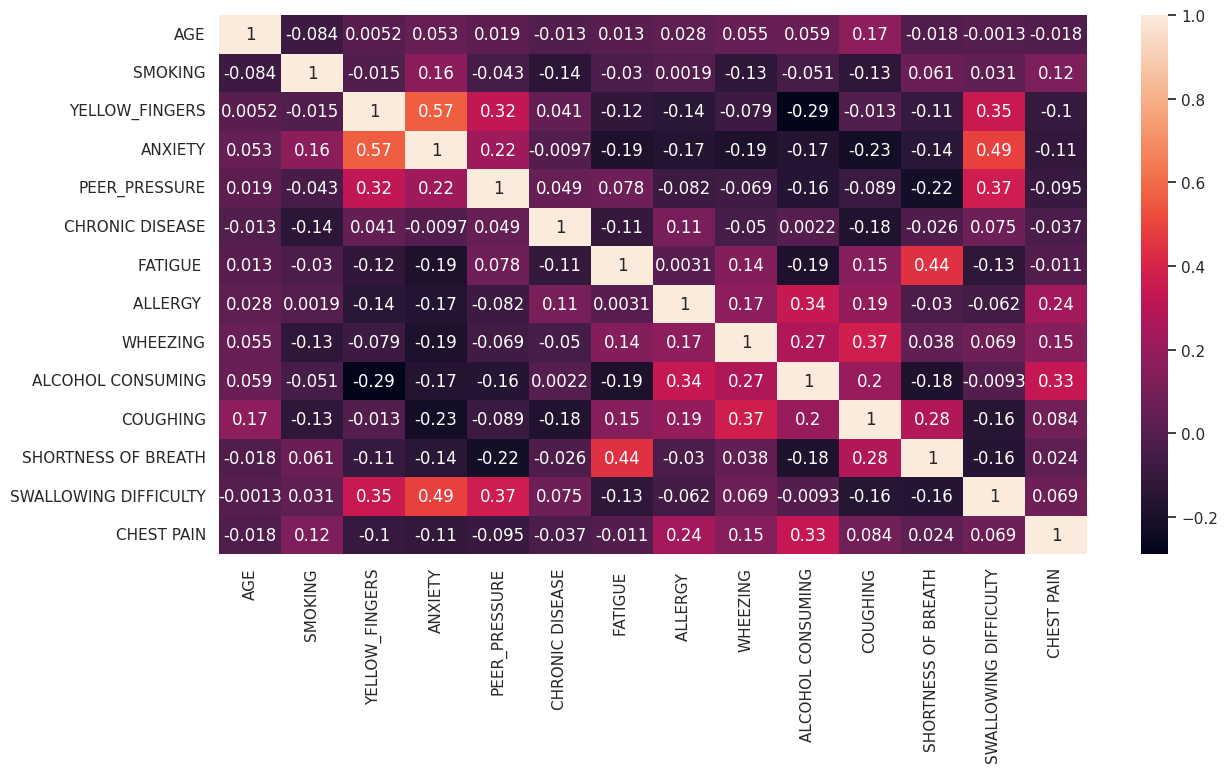

In [5]:
# Проверим корреляцию
sns.set(rc={'figure.figsize': (14, 7)})
sns.heatmap(ds.corr(), annot=True)

In [36]:
x = ds.drop('LUNG_CANCER', axis=1)
y = ds['LUNG_CANCER']
# разбиение выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:

# воспульзуемся моделью логистической регрессии
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train) # обучение модели
preds = model.predict(x_test) # предсказание
# оценим качество модели
r2_score(y_test, preds)

0.33689839572192504

In [38]:
print(f'accuracy: {round(accuracy_score(y_test, preds), 2)}')

accuracy: 0.9


In [39]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.91      0.98      0.94        51

    accuracy                           0.90        62
   macro avg       0.88      0.76      0.81        62
weighted avg       0.90      0.90      0.89        62



In [40]:
# попробуем нормализовать данные и посмотрим результат
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train) # обучение модели
preds = model.predict(x_test) # предсказание
# оценим качество модели
r2_score(y_test, preds)

0.7615384615384616

In [41]:
print(f'accuracy: {round(accuracy_score(y_test, preds), 2)}')

accuracy: 0.97


Как видим после нормализации данных модель стала лучше